Text(0, 0.5, 'Sepal width')

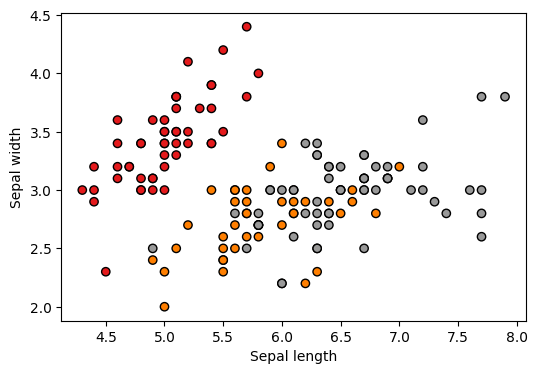

In [12]:
#Importamos librerias 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets


#Cargamos los datos
iris = datasets.load_iris()
conjunto_datos_original = iris.data
clases = iris.target

plt.figure(2, figsize=(6, 4))
plt.clf()
plt.scatter(conjunto_datos_original[:, 0], conjunto_datos_original[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor="k") # Seleccionamos las dos primeras caracteristicas (longitud del sepalo y ancho del sepalo)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Text(0, 0.5, 'Sepal width (estandarizado)')

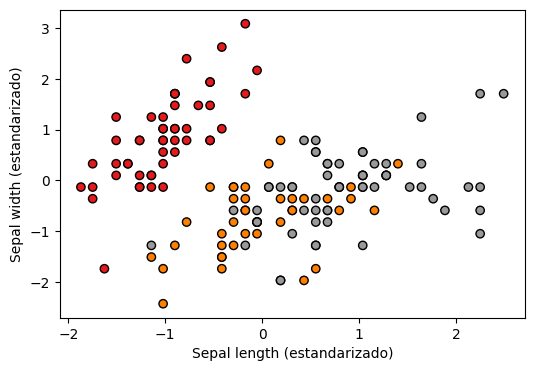

In [13]:
# Utilizamos StandardScaler para estandarizar las características del conjunto de datos
from sklearn.preprocessing import StandardScaler
# Se lo aplicamos al conjunto original
conjunto_datos_estandarizado = StandardScaler().fit_transform(conjunto_datos_original)

# Mostrar la distribucion de los datos escalados utilizando la longitud y el ancho del sepalo
plt.figure(2, figsize=(6, 4))
plt.clf()
plt.scatter(conjunto_datos_estandarizado[:, 0], conjunto_datos_estandarizado[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length (estandarizado)")
plt.ylabel("Sepal width (estandarizado)")

Text(0, 0.5, 'Sepal width (normalizado)')

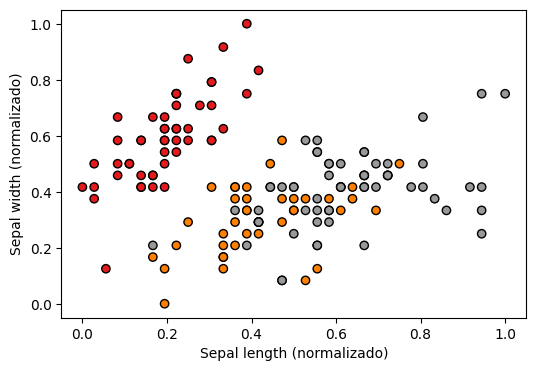

In [14]:
# Utilizamos MinMaxScaler para normalizar las características del conjunto de datos
from sklearn.preprocessing import MinMaxScaler
# Se lo aplicamos al conjunto original
scaler = MinMaxScaler(feature_range=(0,1))
conjunto_datos_normalizado = scaler.fit_transform(conjunto_datos_original)

plt.figure(2, figsize=(6, 4))
plt.clf()
plt.scatter(conjunto_datos_normalizado[:, 0], conjunto_datos_normalizado[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length (normalizado)")
plt.ylabel("Sepal width (normalizado)")


In [ ]:
# Breve explicación y varianza por componente
from sklearn.decomposition import PCA
from IPython.display import display, Markdown

pca = PCA()
conjunto_datos_originalPCA = pca.fit_transform(conjunto_datos_original)
explained_variance_ratio = pca.explained_variance_ratio_

display(Markdown("PCA ordena las componentes por la varianza que explican; `PCA(0.95)` y `PCA(0.80)` devuelve el nº mínimo de componentes cuya varianza acumulada alcanza al menos el 95% y el 80%, respectivamente."))

# Mostrar varianza por componente
print('Varianza explicada por componente (%):')
for i, v in enumerate(explained_variance_ratio, start=1):
    print(f"  Componente {i}: {v * 100:.2f}%")


PCA ordena las componentes por la varianza que explican; `PCA(0.95)` y `PCA(0.80)` devuelve el nº mínimo de componentes cuya varianza acumulada alcanza al menos el 95% y el 80%, respectivamente.

Varianza explicada por componente (%):
  Componente 1: 92.46%
  Componente 2: 5.31%
  Componente 3: 1.71%
  Componente 4: 0.52%


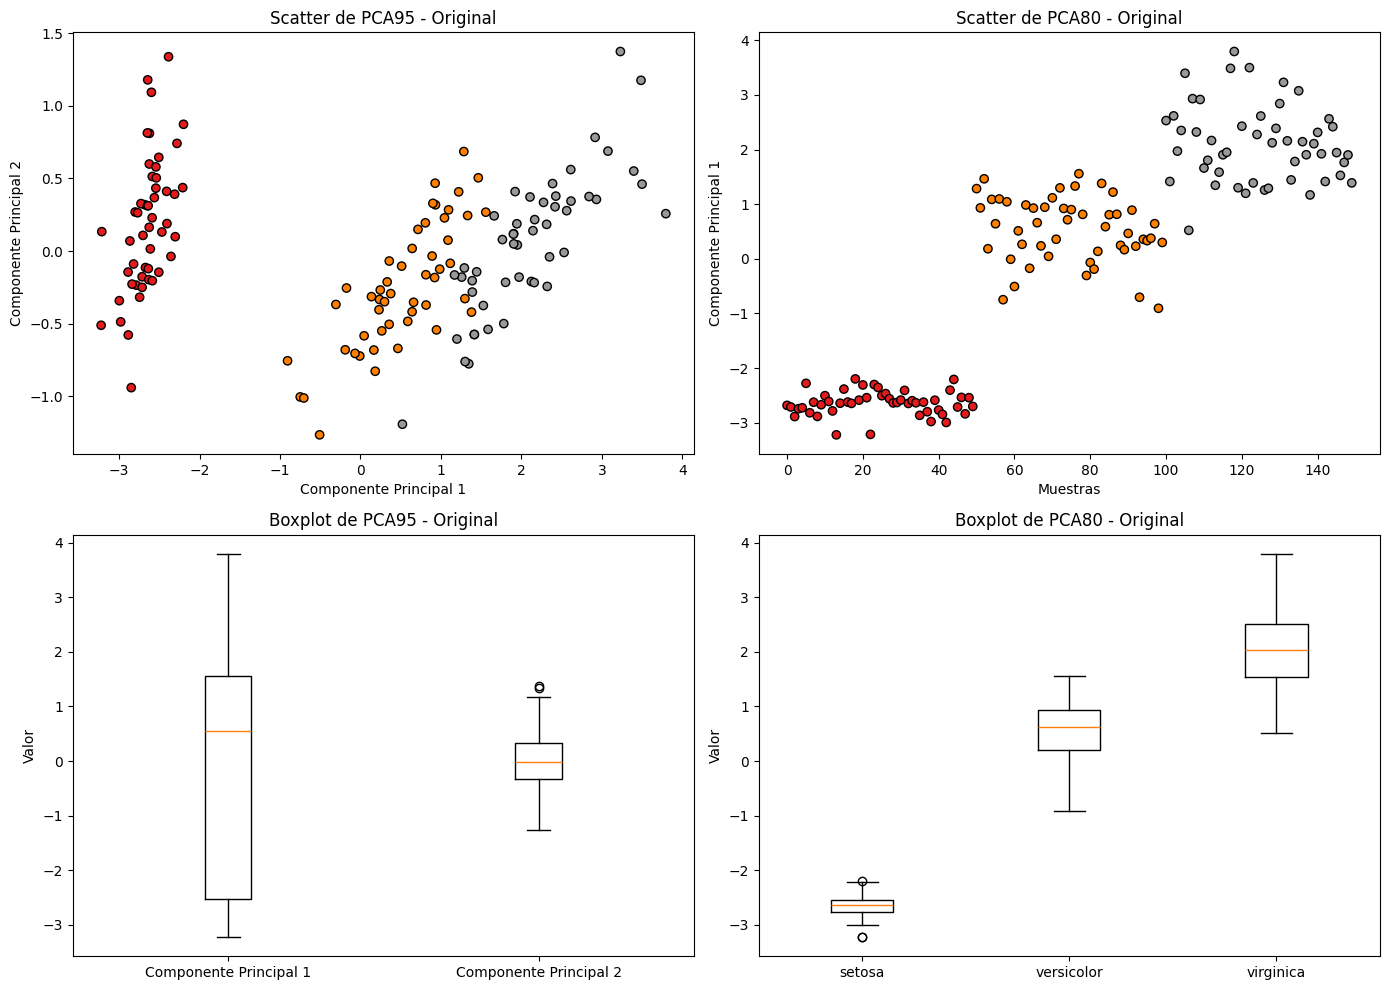

In [ ]:
#Aplicamos PCA a el conjunto original


# PCA 95% y 80% sobre el conjunto original
pca95 = PCA(0.95)
X95 = pca95.fit_transform(conjunto_datos_original)

pca80 = PCA(0.80)
X80 = pca80.fit_transform(conjunto_datos_original)



fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# scatter PCA95
if X95.shape[1] >= 2:
    axs[0, 0].scatter(X95[:, 0], X95[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 0].set_xlabel('Componente Principal 1')
    axs[0, 0].set_ylabel('Componente Principal 2')
else:
    axs[0, 0].scatter(np.arange(len(X95[:, 0])), X95[:, 0], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 0].set_xlabel('Muestras')
    axs[0, 0].set_ylabel('Componente Principal 1')
axs[0, 0].set_title('Scatter de PCA95 - Original')

# scatter PCA80 por muestras, puesto que PCA80 tiene una sola componente principal
if X80.shape[1] >= 2:
    axs[0, 1].scatter(X80[:, 0], X80[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 1].set_xlabel('Componente Principal 1')
    axs[0, 1].set_ylabel('Componente Principal 2')
else:
    axs[0, 1].scatter(np.arange(len(X80[:, 0])), X80[:, 0], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 1].set_xlabel('Muestras')
    axs[0, 1].set_ylabel('Componente Principal 1')
axs[0, 1].set_title('Scatter de PCA80 - Original')

# boxplot PCA95 
axs[1, 0].set_title('Boxplot de PCA95 - Original')
if X95.shape[1] >= 2:
    axs[1, 0].boxplot([X95[:, 0], X95[:, 1]])
    axs[1, 0].set_xticklabels(['Componente Principal 1', 'Componente Principal 2'])
else:
    axs[1, 0].boxplot(X95[:, 0])
    axs[1, 0].set_xticklabels(['Componente Principal 1'])
axs[1, 0].set_ylabel('Valor')

# boxplot PCA80 por clase, puesto que PCA80 tiene una sola componente principal
axs[1, 1].set_title('Boxplot de PCA80 - Original')
comp1_80 = X80[:, 0]
clases_unicas = np.unique(clases)
data_por_clase_80 = [comp1_80[clases == k] for k in clases_unicas]
iris_target_names = iris.target_names
axs[1, 1].boxplot(data_por_clase_80)
axs[1, 1].set_xticklabels([iris_target_names[int(k)] for k in clases_unicas])
axs[1, 1].set_ylabel('Valor')

plt.tight_layout() 
plt.show()

In [ ]:
# Breve explicación y varianza por componente
pca = PCA()
conjunto_datos_estandarizadoPCA = pca.fit_transform(conjunto_datos_estandarizado)
explained_variance_ratio = pca.explained_variance_ratio_

display(Markdown("PCA ordena las componentes por la varianza que explican; `PCA(0.95)` y `PCA(0.80)` devuelve el nº mínimo de componentes cuya varianza acumulada alcanza al menos el 95% y el 80%, respectivamente."))

# Mostrar varianza por componente
print('Varianza explicada por componente (%):')
for i, v in enumerate(explained_variance_ratio, start=1):
    print(f"  Componente {i}: {v * 100:.2f}%")


PCA ordena las componentes por la varianza que explican; `PCA(0.95)` y `PCA(0.80)` devuelve el nº mínimo de componentes cuya varianza acumulada alcanza al menos el 95% y el 80%, respectivamente.

Varianza explicada por componente (%):
  Componente 1: 72.96%
  Componente 2: 22.85%
  Componente 3: 3.67%
  Componente 4: 0.52%


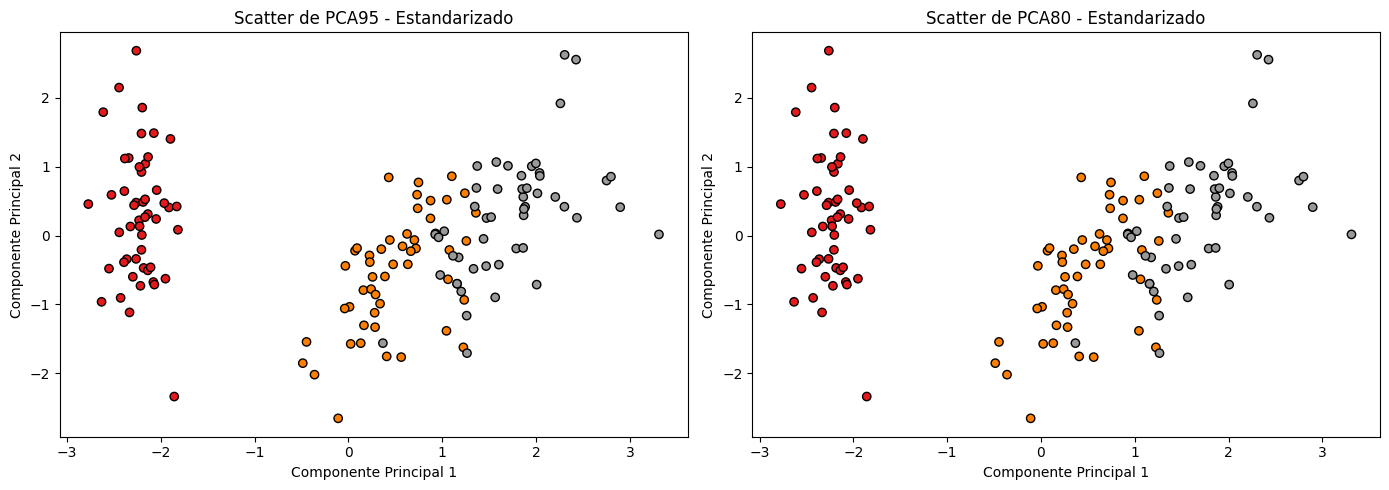

In [ ]:
# PCA sobre el conjunto estandarizado


# PCA 95% sobre conjunto estandarizado
pca95_std = PCA(0.95)
X95_std = pca95_std.fit_transform(conjunto_datos_estandarizado)

# PCA 80% sobre conjunto estandarizado
pca80_std = PCA(0.80)
X80_std = pca80_std.fit_transform(conjunto_datos_estandarizado)

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# scatter PCA95 (izquierda)
if X95_std.shape[1] >= 2:
    axs[0].scatter(X95_std[:, 0], X95_std[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0].set_xlabel('Componente Principal 1')
    axs[0].set_ylabel('Componente Principal 2')
else:
    axs[0].scatter(np.arange(len(X95_std[:, 0])), X95_std[:, 0], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0].set_xlabel('Muestras')
    axs[0].set_ylabel('Componente Principal 1')
axs[0].set_title('Scatter de PCA95 - Estandarizado')

# scatter PCA80 (derecha)
if X80_std.shape[1] >= 2:
    axs[1].scatter(X80_std[:, 0], X80_std[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[1].set_xlabel('Componente Principal 1')
    axs[1].set_ylabel('Componente Principal 2')
else:
    axs[1].scatter(np.arange(len(X80_std[:, 0])), X80_std[:, 0], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[1].set_xlabel('Muestras')
    axs[1].set_ylabel('Componente Principal 1')
axs[1].set_title('Scatter de PCA80 - Estandarizado')

plt.tight_layout()
plt.show()

In [ ]:
# Breve explicación y varianza por componente
pca = PCA()
conjunto_datos_normalizadoPCA = pca.fit_transform(conjunto_datos_normalizado)
explained_variance_ratio = pca.explained_variance_ratio_

display(Markdown("PCA ordena las componentes por la varianza que explican; `PCA(0.95)` y `PCA(0.80)` devuelve el nº mínimo de componentes cuya varianza acumulada alcanza al menos el 95% y el 80%, respectivamente."))

# Mostrar varianza por componente
print('Varianza explicada por componente (%):')
for i, v in enumerate(explained_variance_ratio, start=1):
    print(f"  Componente {i}: {v * 100:.2f}%")


PCA ordena las componentes por la varianza que explican; `PCA(0.95)` y `PCA(0.80)` devuelve el nº mínimo de componentes cuya varianza acumulada alcanza al menos el 95% y el 80%, respectivamente.

Varianza explicada por componente (%):
  Componente 1: 84.14%
  Componente 2: 11.75%
  Componente 3: 3.47%
  Componente 4: 0.64%


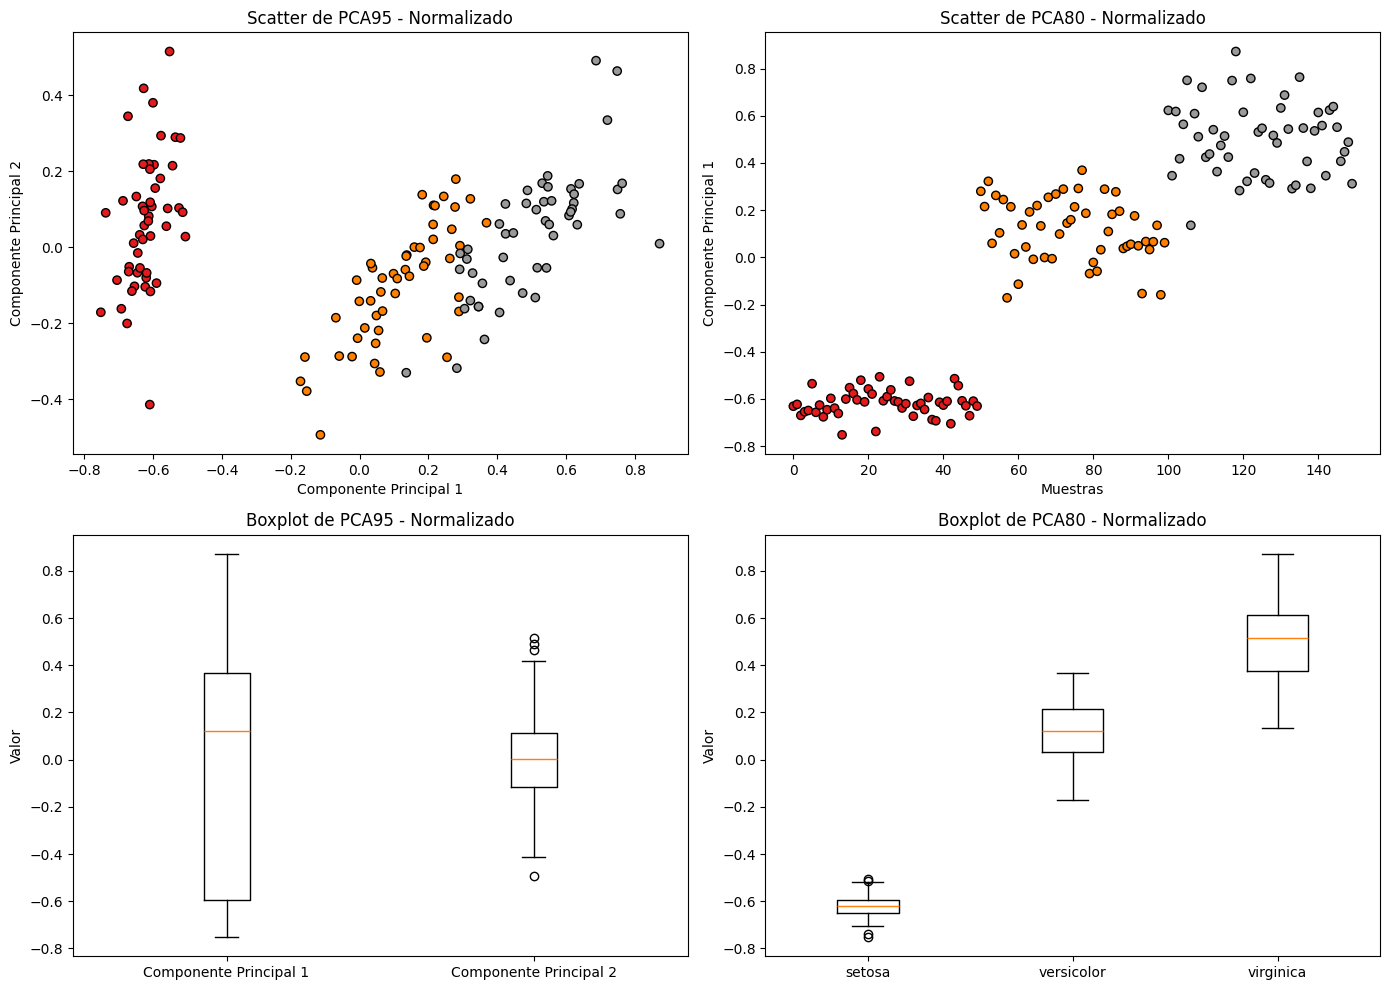

In [ ]:
# PCA sobre el conjunto normalizado


# PCA 95% sobre conjunto normalizado
pca95_norm = PCA(0.95)
X95_norm = pca95_norm.fit_transform(conjunto_datos_normalizado)

# PCA 80% sobre conjunto normalizado
pca80_norm = PCA(0.80)
X80_norm = pca80_norm.fit_transform(conjunto_datos_normalizado)

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# scatter PCA95
if X95_norm.shape[1] >= 2:
    axs[0, 0].scatter(X95_norm[:, 0], X95_norm[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 0].set_xlabel('Componente Principal 1')
    axs[0, 0].set_ylabel('Componente Principal 2')
else:
    axs[0, 0].scatter(np.arange(len(X95_norm[:, 0])), X95_norm[:, 0], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 0].set_xlabel('Muestras')
    axs[0, 0].set_ylabel('Componente Principal 1')
axs[0, 0].set_title('Scatter de PCA95 - Normalizado')

# scatter PCA80
if X80_norm.shape[1] >= 2:
    axs[0, 1].scatter(X80_norm[:, 0], X80_norm[:, 1], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 1].set_xlabel('Componente Principal 1')
    axs[0, 1].set_ylabel('Componente Principal 2')
else:
    axs[0, 1].scatter(np.arange(len(X80_norm[:, 0])), X80_norm[:, 0], c=clases, cmap=plt.cm.Set1, edgecolor='k')
    axs[0, 1].set_xlabel('Muestras')
    axs[0, 1].set_ylabel('Componente Principal 1')
axs[0, 1].set_title('Scatter de PCA80 - Normalizado')

#  boxplot PCA95 (componentes 1 y 2 si existen)
axs[1, 0].set_title('Boxplot de PCA95 - Normalizado')
if X95_norm.shape[1] >= 2:
    axs[1, 0].boxplot([X95_norm[:, 0], X95_norm[:, 1]])
    axs[1, 0].set_xticklabels(['Componente Principal 1', 'Componente Principal 2'])
else:
    axs[1, 0].boxplot(X95_norm[:, 0])
    axs[1, 0].set_xticklabels(['Componente Principal 1'])
axs[1, 0].set_ylabel('Valor')

# boxplot PCA80 por clase 
axs[1, 1].set_title('Boxplot de PCA80 - Normalizado')
comp1_80 = X80_norm[:, 0]
clases_unicas = np.unique(clases)
data_por_clase_80 = [comp1_80[clases == k] for k in clases_unicas]
iris_target_names = iris.target_names
axs[1, 1].boxplot(data_por_clase_80)
axs[1, 1].set_xticklabels([iris_target_names[int(k)] for k in clases_unicas])
axs[1, 1].set_ylabel('Valor')

plt.tight_layout()
plt.show()

In [ ]:
import os
import numpy as np
from sklearn.decomposition import PCA

# --- CONFIGURACIÓN INICIAL ---
k = 5
y = clases  # Las etiquetas son las mismas para todos los casos

# Diccionario con tus 3 conjuntos de datos base
# Asegúrate de que estas variables (conjunto_datos_estandarizado, etc.) existen en tu entorno
datasets_base = {
    "Original": conjunto_datos_original,
    "Estandarizado": conjunto_datos_estandarizado,
    "Normalizado": conjunto_datos_normalizado
}

# --- FUNCIÓN PARA GENERAR PLIEGUES ---
def generar_y_guardar_pliegues(X_data, y_data, output_folder, suffix_name=""):
    """
    X_data: Datos (features)
    y_data: Etiquetas
    output_folder: Carpeta donde guardar los csv
    suffix_name: Sufijo para el nombre del archivo (ej: "_pca95")
    """
    
    # 1. Crear la carpeta si no existe
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
        print(f"--> Carpeta creada: {output_folder}")

    # 2. Separar por clases (Estratificación manual para Iris)
    # Asumimos que las clases son 0, 1, 2 y están balanceadas (50 c/u)
    X_c0 = X_data[y_data == 0]
    X_c1 = X_data[y_data == 1]
    X_c2 = X_data[y_data == 2]
    
    y_c0 = y_data[y_data == 0]
    y_c1 = y_data[y_data == 1]
    y_c2 = y_data[y_data == 2]

    # 3. Crear las partes
    n_per_class = X_c0.shape[0] # 50
    fold_size = n_per_class // k # 10
    parts = []

    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        # Concatenar los trozos de cada clase para este pliegue
        X_fold = np.concatenate((X_c0[start:end], X_c1[start:end], X_c2[start:end]))
        y_fold = np.concatenate((y_c0[start:end], y_c1[start:end], y_c2[start:end]))
        parts.append((X_fold, y_fold))

    # 4. Generar iteraciones Train/Test y guardar
    for i in range(k):
        # Test: es la parte 'i'
        X_test, y_test = parts[i]
        
        # Train: son todas las partes menos 'i'
        train_parts_X = [parts[j][0] for j in range(k) if j != i]
        train_parts_y = [parts[j][1] for j in range(k) if j != i]
        
        X_train = np.concatenate(train_parts_X)
        y_train = np.concatenate(train_parts_y)
        
        # Unir X e y para guardar en CSV
        train_data = np.c_[X_train, y_train.reshape(-1, 1)]
        test_data = np.c_[X_test, y_test.reshape(-1, 1)]
        
        # Nombres de archivo: training1.csv, training1_pca95.csv, etc.
        name_train = f"training{i+1}{suffix_name}.csv"
        name_test = f"test{i+1}{suffix_name}.csv"
        
        # Rutas completas
        path_train = os.path.join(output_folder, name_train)
        path_test = os.path.join(output_folder, name_test)
        
        np.savetxt(path_train, train_data, delimiter=",", fmt="%.5f")
        np.savetxt(path_test, test_data, delimiter=",", fmt="%.5f")

# --- BUCLE PRINCIPAL DE PROCESAMIENTO ---

print("Iniciando generación de archivos...")

for nombre_set, datos_X in datasets_base.items():
    print(f"\nProcesando conjunto: {nombre_set}...")
    
    # 1. Sin PCA
    # Genera: training1.csv, test1.csv ...
    generar_y_guardar_pliegues(datos_X, y, output_folder=nombre_set, suffix_name="")
    
    # 2. Con PCA 95% (0.95)
    # Genera: training1_pca95.csv, test1_pca95.csv ...
    pca95 = PCA(n_components=0.95)
    X_pca95 = pca95.fit_transform(datos_X)
    generar_y_guardar_pliegues(X_pca95, y, output_folder=nombre_set, suffix_name="_pca95")
    
    # 3. Con PCA 80% (0.80)
    # Genera: training1_pca80.csv, test1_pca80.csv ...
    pca80 = PCA(n_components=0.80)
    X_pca80 = pca80.fit_transform(datos_X)
    generar_y_guardar_pliegues(X_pca80, y, output_folder=nombre_set, suffix_name="_pca80")

print("\n¡Todos los archivos han sido generados y organizados en carpetas!")

Datos de entrada (X): (150, 4)
Datos de entrada (y): (150,)
Número de pliegues (k): 5

--- Datos separados por clase ---
Forma de X_class_0: (50, 4)
Forma de X_class_1: (50, 4)
Forma de X_class_2: (50, 4)

--- Pliegues (Partes) creados ---
Número de partes creadas: 5
Forma de la Parte 1 (X): (30, 4)
Forma de la Parte 1 (y): (30,)

--- Guardando archivos de Training y Test ---
Iteración 1:
  Test:   'test1.csv' (Forma: (30, 5))
  Training: 'training1.csv' (Forma: (120, 5))
Iteración 2:
  Test:   'test2.csv' (Forma: (30, 5))
  Training: 'training2.csv' (Forma: (120, 5))
Iteración 3:
  Test:   'test3.csv' (Forma: (30, 5))
  Training: 'training3.csv' (Forma: (120, 5))
Iteración 4:
  Test:   'test4.csv' (Forma: (30, 5))
  Training: 'training4.csv' (Forma: (120, 5))
Iteración 5:
  Test:   'test5.csv' (Forma: (30, 5))
  Training: 'training5.csv' (Forma: (120, 5))

¡Proceso completado!
